#

In [2]:
# 🧲 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os


In [3]:
# For reading Excel files
import openpyxl

In [4]:
# 📂 2. Load Dataset Files (Food)
food_df = pd.read_excel("C:\\Users\\x3rit\\Desktop\\assignment\\data-excels-for-db\\food-calories.xlsx")


print("Food Data Sample:")
display(food_df.head())




Food Data Sample:


,ID,name,Food Group,Calories,Fat (g),Protein (g),Carbohydrate (g),Serving Description 1 (g)
0,1,Apple,Fruits,52,0.2,0.3,14.0,100
1,2,Banana,Fruits,96,0.3,1.3,27.0,118
2,3,Chicken Breast,Meat,165,3.6,31.0,0.0,100
3,4,Broccoli,Vegetables,55,0.3,3.7,11.0,91
4,5,Rice,Grains,130,0.3,2.7,28.0,158


In [5]:
food_df.columns

Index(['ID', 'name', 'Food Group', 'Calories', 'Fat (g)', 'Protein (g)',
       'Carbohydrate (g)', 'Serving Description 1 (g)'],
      dtype='object')

In [6]:
# 📂 2. Load Dataset Files (Food and Activities)
activity_df = pd.read_excel("C:\\Users\\x3rit\\Desktop\\assignment\\data-excels-for-db\\MET-values.xlsx")
print("Activity Data Sample:")
display(activity_df.head())

Activity Data Sample:


,ACTIVITY,SPECIFIC MOTION,METs
0,Walking,Strolling,2.0
1,Running,Jogging,7.0
2,Cycling,Leisure cycling,4.0
3,Swimming,Freestyle moderate,6.0
4,Yoga,Hatha yoga,2.5


In [7]:
activity_df.columns

Index(['ACTIVITY', 'SPECIFIC MOTION', 'METs'], dtype='object')

In [8]:
# 👤 3. Input User Information Dynamically
print("\nEnter User Information:")
name = input("Name: ")
age = int(input("Age (in years): "))
sex = input("Sex (male/female): ")
weight = float(input("Weight (in kg): "))
height = float(input("Height (in cm): "))

user = {
    'name': name,
    'age': age,
    'sex': sex,
    'weight': weight,
    'height': height
}

user_df = pd.DataFrame([user])
user_file = "users.csv"
if os.path.exists(user_file):
    existing_users = pd.read_csv(user_file)
    updated_users = pd.concat([existing_users, user_df], ignore_index=True)
    updated_users.to_csv(user_file, index=False)
else:
    user_df.to_csv(user_file, index=False)


Enter User Information:


Name:  Damini
Age (in years):  30
Sex (male/female):  female
Weight (in kg):  69
Height (in cm):  160


Your BMI is: 26.95
You are categorized as: Overweight


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


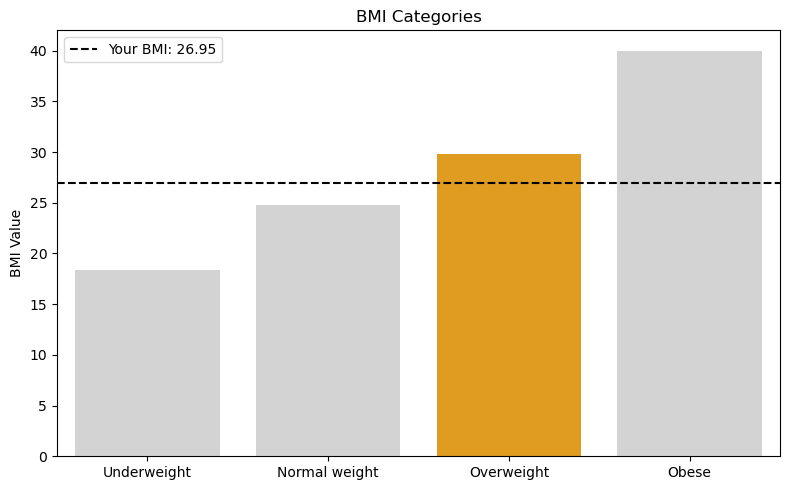

In [9]:
# --- BMI Calculation and Visualization ---

height_m = height / 100  # Convert height to meters
bmi = weight / (height_m ** 2)
bmi = round(bmi, 2)

# Determine BMI category
if bmi < 18.5:
    category = 'Underweight'
    color = 'skyblue'
elif 18.5 <= bmi < 24.9:
    category = 'Normal weight'
    color = 'green'
elif 25 <= bmi < 29.9:
    category = 'Overweight'
    color = 'orange'
else:
    category = 'Obese'
    color = 'red'

# Display BMI and category
print(f"Your BMI is: {bmi}")
print(f"You are categorized as: {category}")

# Create a bar chart for BMI categories
categories = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
colors = ['skyblue', 'green', 'orange', 'red']
values = [18.4, 24.8, 29.8, 40]  # Upper bounds for each category

# Highlight the user's category
highlight = [color if cat == category else 'lightgrey' for cat in categories]

plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=values, palette=highlight)
plt.axhline(bmi, color='black', linestyle='--', label=f'Your BMI: {bmi}')
plt.title('BMI Categories')
plt.ylabel('BMI Value')
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# 🔢 4. Calculate BMR
def calculate_bmr(sex, weight, height, age):
    if sex.lower() == 'male':
        return 66.4730 + (13.7516 * weight) + (5.0033 * height) - (6.7550 * age)
    else:
        return 655.0955 + (9.5634 * weight) + (1.8496 * height) - (4.6756 * age)

bmr = calculate_bmr(user['sex'], user['weight'], user['height'], user['age'])
print(f"\nBMR for {user['name']} is {bmr:.2f} calories/day")


BMR for Damini is 1470.64 calories/day


In [11]:
# ⚙️ 5. Activity Calories Calculation Function
def calculate_activity_calories(met, weight, duration_min):
    return met * weight * (duration_min / 60)


In [12]:
def log_day(date, food_entries, activity_entries):
    total_calories_in = 0
    total_calories_out = 0

    log_rows = []

    # Processing food entries
    for entry in food_entries:
        food_name, quantity, meal_time = entry
        match = food_df[food_df['name'].str.lower() == food_name.lower()]
        if not match.empty:
            cal_per_serving = match['Calories'].values[0]
            total = cal_per_serving * quantity
            total_calories_in += total
            log_rows.append([user['name'], date, food_name, quantity, meal_time, total, '', '', ''])

    # Processing activity entries
    for entry in activity_entries:
        activity_name, duration_min = entry
        match = activity_df[activity_df['ACTIVITY'].str.lower().str.strip() == activity_name.lower().strip()]
        if not match.empty:
            met = match['METs'].values[0]
            calories_burned = calculate_activity_calories(met, user['weight'], duration_min)
            total_calories_out += calories_burned
            log_rows.append([user['name'], date, '', '', '', '', activity_name, duration_min, calories_burned])
        else:
            print(f"⚠️ Activity '{activity_name}' not found in database.")

    # Calculate net calories
    net_calories = total_calories_in - bmr - total_calories_out
    return log_rows, total_calories_in, total_calories_out, net_calories

In [13]:
# ✏️ 7. Dynamic User Input for Daily Log

In [14]:
# Food Entries
print("\nEnter Food Entries:")
food_entries = []
while True:
    food_name = input("Food Name (or type 'done' to finish): ")
    if food_name.lower() == 'done':
        break
    quantity = float(input("Quantity (number of servings): "))
    meal_time = input("Meal Time (Breakfast/Lunch/Dinner/Snack): ")
    food_entries.append((food_name, quantity, meal_time))



Enter Food Entries:


Food Name (or type 'done' to finish):  Beef 81
Quantity (number of servings):  2
Meal Time (Breakfast/Lunch/Dinner/Snack):  Breakfast
Food Name (or type 'done' to finish):  done


In [ ]:
# Activity Entries
print("\nEnter Activity Entries:")
activity_entries = []
while True:
    activity_name = input("Activity Name (or type 'done' to finish): ")
    if activity_name.lower() == 'done':
        break
    duration_min = float(input("Duration in minutes: "))
    activity_entries.append((activity_name, duration_min))


Enter Activity Entries:


In [ ]:
# Log the Day
today = datetime.today().date()
log_rows, cals_in, cals_out, net = log_day(today, food_entries, activity_entries)
daily_log = pd.DataFrame(log_rows, columns=["User", "Date", "Food Item", "Quantity", "Meal Time", "Calories In", "Activity", "Duration (min)", "Calories Out"])

print("\n📊 Daily Log")
display(daily_log)

print(f"\nTotal Calories In: {cals_in:.2f}")
print(f"Total Calories Out (Activities): {cals_out:.2f}")
print(f"Net Calories (In - BMR - Out): {net:.2f}")

In [ ]:
# Save Daily Log
log_file = "daily_logs.csv"
if os.path.exists(log_file):
    existing_log = pd.read_csv(log_file)
    updated_log = pd.concat([existing_log, daily_log], ignore_index=True)
    updated_log.to_csv(log_file, index=False)
else:
    daily_log.to_csv(log_file, index=False)
print("Daily log saved to 'daily_logs.csv'.")


In [ ]:
# 📈 8. Visualize Calories Summary

summary_df = pd.DataFrame({
    'Metric': ['Calories In', 'BMR', 'Calories Out', 'Net Calories'],
    'Value': [cals_in, bmr, cals_out, net]
})

sns.barplot(data=summary_df, x='Metric', y='Value', palette='coolwarm')
plt.title('Calorie Summary for the Day')
plt.ylabel('Calories')
plt.show()

In [ ]:
# 📅 Read all logs (multi-day tracking)
log_file = "daily_logs.csv"
if os.path.exists(log_file):
    all_logs = pd.read_csv(log_file)

    # Convert 'Date' column to datetime
    all_logs['Date'] = pd.to_datetime(all_logs['Date'])

    # 🔥 Summarize Calories In, Calories Out, and Net per day
    daily_summary = all_logs.groupby('Date').agg({
        'Calories In': 'sum',
        'Calories Out': 'sum'
    }).reset_index()

    # Calculate Net Calories
    daily_summary['Net Calories'] = daily_summary['Calories In'] - bmr - daily_summary['Calories Out']

    print("\n🗓️ Multi-Day Summary:")
    display(daily_summary)
else:
    print("No previous logs found.")


In [ ]:
# 📈 Visualize Calories Over Days
plt.figure(figsize=(12, 6))
plt.plot(daily_summary['Date'], daily_summary['Calories In'], label='Calories In', marker='o')
plt.plot(daily_summary['Date'], daily_summary['Calories Out'], label='Calories Out', marker='o')
plt.plot(daily_summary['Date'], daily_summary['Net Calories'], label='Net Calories', marker='o')

plt.title('Calories Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
